In [132]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

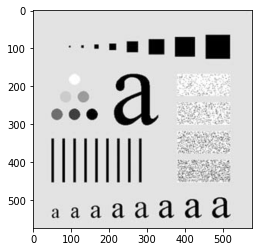

In [133]:
A = cv2.imread("A.png",0)
rows, cols = A.shape
plt.imshow(A,cmap='gray')

In [134]:
def distance(u,v,rows,cols):
    return math.sqrt((u - rows / 2)**2 + (v - cols / 2)**2)

In [135]:
def ideal_low_filter(D0):
    ideal_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            if distance(x,y,rows,cols) <= D0:
                ideal_low[x][y] = 1
    return ideal_low

def ideal_hight_filter(D0):
    ideal_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            if distance(x,y,rows,cols) > D0:
                ideal_hight[x][y] = 1
    return ideal_hight

In [136]:
def batervort_low_filter(D0,n):
    batervort_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            batervort_low[x][y] = 1 / (1 + (distance(x, y, rows, cols)/D0)**(2*n))
    return batervort_low

def batervort_hight_filter(D0,n):
    batervort_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            batervort_hight[x][y] = 1 - 1 / (1 + (distance(x, y, rows, cols)/D0)**(2*n))
    return batervort_hight

In [137]:
def gause_low_filter(D0):
    gause_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = D0**2 * 2
            gause_low[x][y] = math.exp((-1*distance(x,y,rows,cols)**2)/d)
    return gause_low

def gause_hight_filter(D0):
    gause_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = D0**2 * 2
            gause_hight[x][y] =1 - math.exp((-1*distance(x,y,rows,cols)**2)/d)
    return gause_hight

In [138]:
def spectrum(img):
    fft = np.fft.fft2(img) # фурье
    fft_shift = np.fft.fftshift(fft) # сдвиг массива в центр
    return fft_shift

#Пространственный фильтр
def change_spectrum(img, mask):
    fshift = img * mask
    f_isshift = np.fft.ifftshift(fshift)
    img_back = np.fft.irfft2(f_isshift) #обратный фурье
    return fshift, img_back

def print_spectrum(img):
    magnitude_spectrum = np.abs(img)**0.1
    plt.imshow(magnitude_spectrum, cmap= 'gray')

def print_img(img):
    filtered_img = np.abs(img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img * 255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    plt.imshow(filtered_img, cmap= 'gray')
    return filtered_img

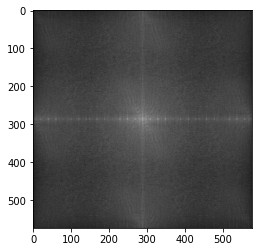

In [139]:
sp = spectrum(A)
print_spectrum(sp)

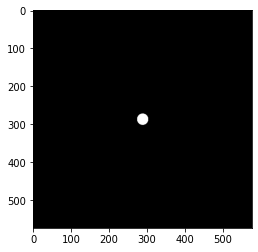

In [140]:
D = 15
n = 2

ILFF = ideal_low_filter(D)
print_spectrum(ILFF)

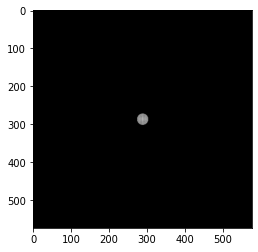

In [141]:
spc,img_back = change_spectrum(sp, ILFF)
print_spectrum(spc)

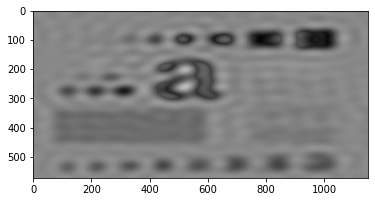

In [142]:
plt.imshow(print_img(img_back),cmap= 'gray')

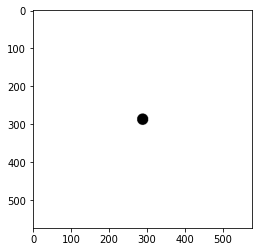

In [143]:
IHFF = ideal_hight_filter(D)
print_spectrum(IHFF)

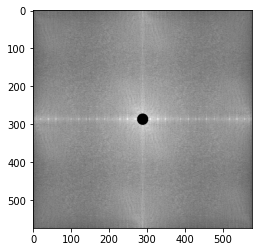

In [144]:
spc,img_back = change_spectrum(sp, IHFF)
print_spectrum(spc)

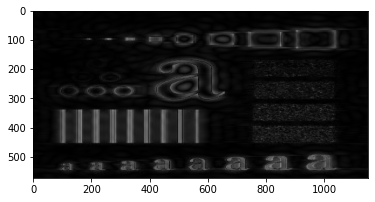

In [145]:
plt.imshow(print_img(img_back),cmap= 'gray')

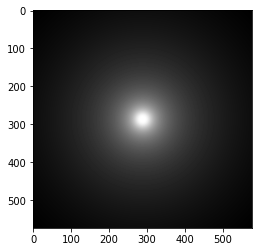

In [146]:
BLFF = batervort_low_filter(D,n)
print_spectrum(BLFF)

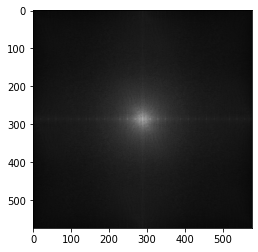

In [147]:
spc,img_back = change_spectrum(sp, BLFF)
print_spectrum(spc)

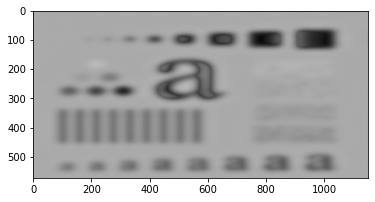

In [148]:
plt.imshow(print_img(img_back),cmap= 'gray')

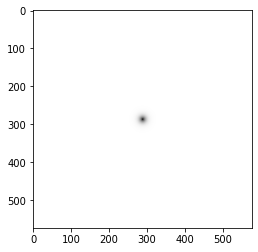

In [149]:
BHFF = batervort_hight_filter(D,n)
print_spectrum(BHFF)

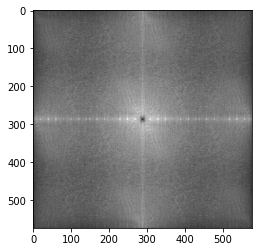

In [150]:
spc,img_back = change_spectrum(sp, BHFF)
print_spectrum(spc)

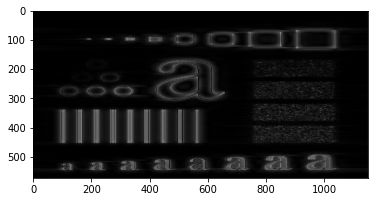

In [151]:
plt.imshow(print_img(img_back),cmap= 'gray')

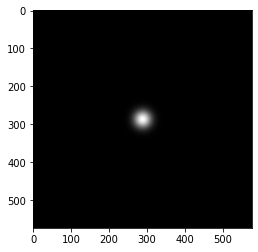

In [152]:
D = 5 

GLFF = gause_low_filter(D)
print_spectrum(GLFF)

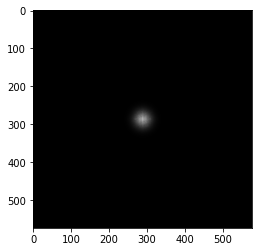

In [153]:
spc,img_back = change_spectrum(sp, GLFF)
print_spectrum(spc)

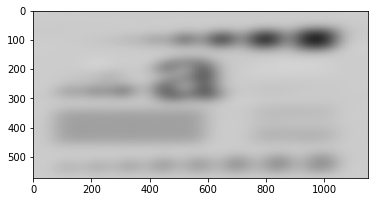

In [154]:
plt.imshow(print_img(img_back),cmap= 'gray')

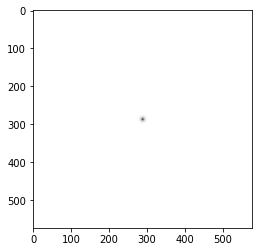

In [158]:
GHFF = gause_hight_filter(D)
print_spectrum(GHFF)

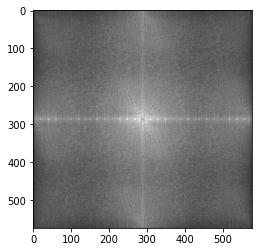

In [159]:
spc,img_back = change_spectrum(sp, GHFF)
print_spectrum(spc)

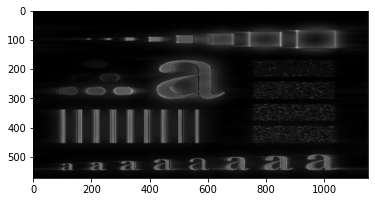

In [160]:
plt.imshow(print_img(img_back),cmap= 'gray')